# Premier League Analysis

## Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/english-premier-league202021/EPL_20_21.csv


## Dataset

In [2]:
data = pd.read_csv('../input/english-premier-league202021/EPL_20_21.csv')
data.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


## Top Goal Scorers

In [3]:
goals = px.bar(data_frame=data.nlargest(10, 'Goals')[['Name', 'Goals']], 
                     x="Name", y="Goals", color="Goals")
goals.update_layout(title_text="Top Goal Scorers", )
goals.show()



**According to the chart, the top scorer for the 20/21 season is Harry Kane followed by Mohamed Salah as second and Bruno Fernandes as third**

## Top Assist Makers

In [4]:
assists = px.bar(data_frame=data.nlargest(10, 'Assists')[['Name', 'Assists']], 
                     x="Name", y="Assists", color="Assists")
assists.update_layout(title_text="Top Assist Makers", )
assists.show()



**AAccording to the chart, Harry kane is the top Assist maker with 14 assists followed by Kevin De Bruyne and Bruno Fernandes both with 12 assists**

## Top Red Cards

In [5]:
Red = px.bar(data_frame=data.nlargest(10, 'Red_Cards')[['Name', 'Red_Cards']], 
                     x="Name", y="Red_Cards", color="Red_Cards")
Red.update_layout(title_text="Top Red Cards", )
Red.show()



## Top Yellow Cards

In [6]:
Yellow = px.bar(data_frame=data.nlargest(10, 'Yellow_Cards')[['Name', 'Yellow_Cards']], 
                     x="Name", y="Yellow_Cards", color="Yellow_Cards")
Yellow.update_layout(title_text="Top Red Cards", )
Yellow.show()



## Top Penalty Attempts


In [7]:

pen_att = px.bar(data_frame=data.nlargest(10, 'Penalty_Attempted')[['Name', 'Penalty_Attempted']], 
                     x="Name", y="Penalty_Attempted", color="Penalty_Attempted")
pen_att.update_layout(title_text="Penalty_Attempted", )
pen_att.show()


## Top Penalty Goals

In [8]:

pen_goals = px.bar(data_frame=data.nlargest(10, 'Penalty_Goals')[['Name', 'Penalty_Goals']], 
                     x="Name", y="Penalty_Goals", color="Penalty_Goals")
pen_goals.update_layout(title_text="Penalty Goals", )
pen_goals.show()


## Top Players in Age

In [9]:

player_age = px.bar(data_frame=data.nlargest(10, 'Age')[['Name', 'Age']], 
                     x="Name", y="Age", color="Age")
player_age.update_layout(title_text="Age Goals", )
player_age.show()


## League Distribution of Ages

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Ages')

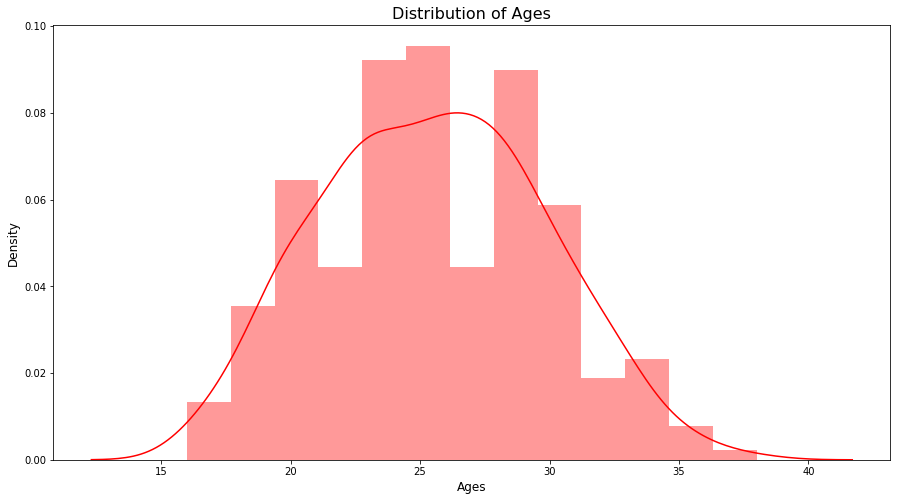

In [10]:
plt.figure(figsize=(15, 8))
sns.distplot(data['Age'], hist=True, color='red')
plt.xlabel("Ages", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title("Distribution of Ages", fontsize=16)

## Most Pass Attempts

In [11]:

pass_attempts = px.bar(data_frame=data.nlargest(10, 'Passes_Attempted')[['Name', 'Passes_Attempted']], 
                     x="Name", y="Passes_Attempted", color="Passes_Attempted")
pass_attempts.update_layout(title_text="Pass Attempts", )
pass_attempts.show()


## Nationalities in The League

In [12]:
nationality = data.groupby('Nationality').size().reset_index(name="count")
fig = px.treemap(nationality, path=['Nationality'], values='count')
fig.update_layout(title_text='League Nationalities')
fig.update_traces(textinfo='label+value')
fig.show()

## Number of Players of each eam

In [13]:
players = data.groupby('Club').size().reset_index(name='count')
fig = px.treemap(players, path=['Club'], values='count')
fig.update_layout(title_text='Team Players')
fig.update_traces(textinfo='label+value')
fig.show()

## Goals by Team

In [14]:
goals = data['Goals'].groupby(data['Club']).sum().sort_values(ascending=False).to_frame()
fig = px.bar(data_frame=goals, x=goals.index, y='Goals', color='Goals')
fig.update_layout(title_text='Goals Scored by each Team')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()


## Assists by Team

In [15]:
assists = data['Assists'].groupby(data['Club']).sum().sort_values(ascending=False).to_frame()
fig = px.bar(data_frame=assists, x=assists.index, y='Assists', color='Assists')
fig.update_layout(title_text='Assists by Team')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()


## Red Cards by Team

In [16]:
red = data['Red_Cards'].groupby(data['Club']).sum().sort_values(ascending=False).to_frame()
fig = px.bar(data_frame=red, x=red.index, y='Red_Cards', color='Red_Cards')
fig.update_layout(title_text='Red Cards by Team')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()


## Yellow Cards by Team

In [17]:
yellow = data['Yellow_Cards'].groupby(data['Club']).sum().sort_values(ascending=False).to_frame()
fig = px.bar(data_frame=yellow, x=yellow.index, y='Yellow_Cards', color='Yellow_Cards')
fig.update_layout(title_text='Yellow Cards by Team')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()
